In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')




In [183]:
df_test=pd.read_csv('/content/SalaryData_Test.csv')

In [184]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [185]:
df_train=pd.read_csv('/content/SalaryData_Train.csv')

In [186]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [187]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [188]:
df_test['Salary']=lb.fit_transform(df_test['Salary'])
df_train['Salary']=lb.fit_transform(df_train['Salary'])

In [189]:
df1_test=pd.get_dummies(df_test)
df1_train=pd.get_dummies(df_train)

In [190]:
x_train=df1_train.drop('Salary',axis=1)
y_train=df1_train['Salary']
x_test=df1_test.drop('Salary',axis=1)
y_test=df1_test['Salary']

In [191]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [192]:
from sklearn.svm import SVC

In [193]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [194]:
pred=model.predict(x_test)

In [195]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [196]:
from sklearn.metrics import classification_report,confusion_matrix

In [197]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[10997  2703]
 [  363   997]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     13700
           1       0.27      0.73      0.39      1360

    accuracy                           0.80     15060
   macro avg       0.62      0.77      0.64     15060
weighted avg       0.90      0.80      0.83     15060



In [198]:
np.mean(pred==y_test)*100


79.64143426294821

#Visualization

<Axes: >

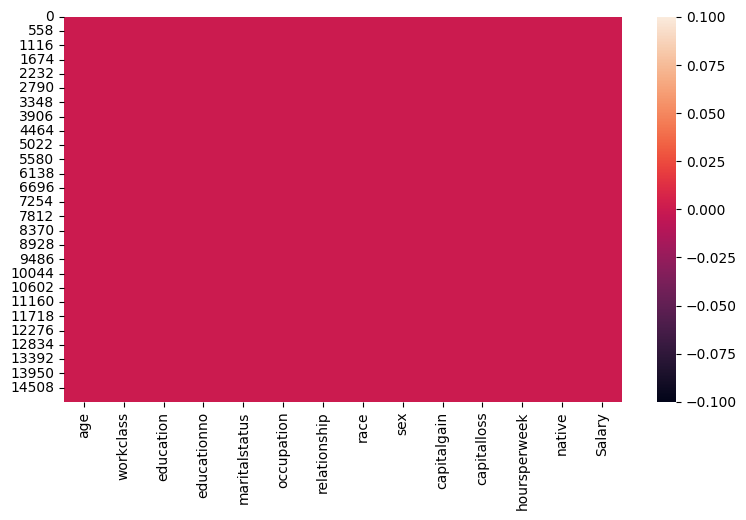

In [199]:
#visualization of salarydata_test ('df_test')
import seaborn as sns
sns.heatmap(df_test.isnull())

Skew: -0.32099937243135945
Kurtosis: 0.6184678428156434


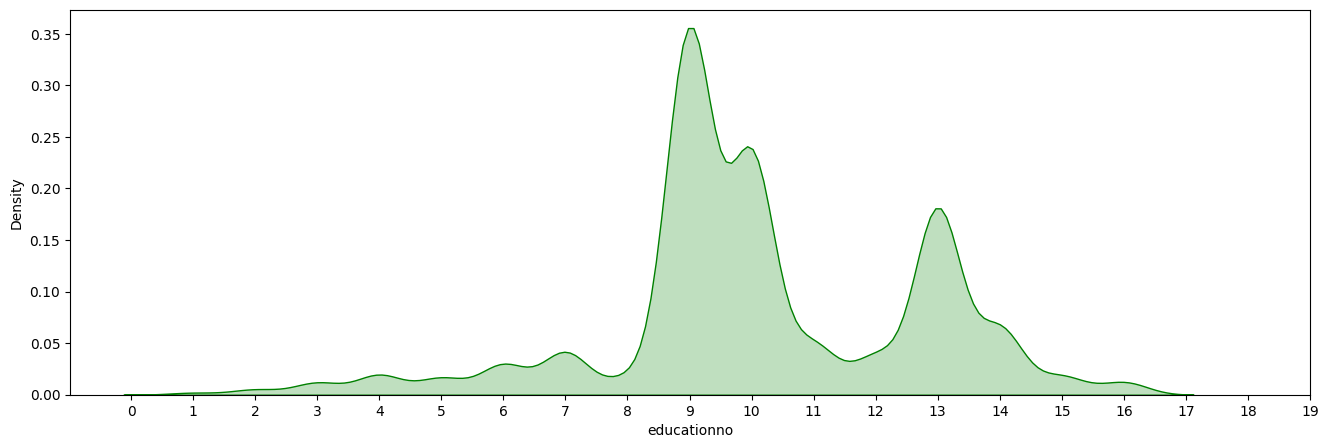

In [200]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df_test['educationno'].skew()))
print("Kurtosis: {}".format(df_test['educationno'].kurtosis()))
ax = sns.kdeplot(df_test['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

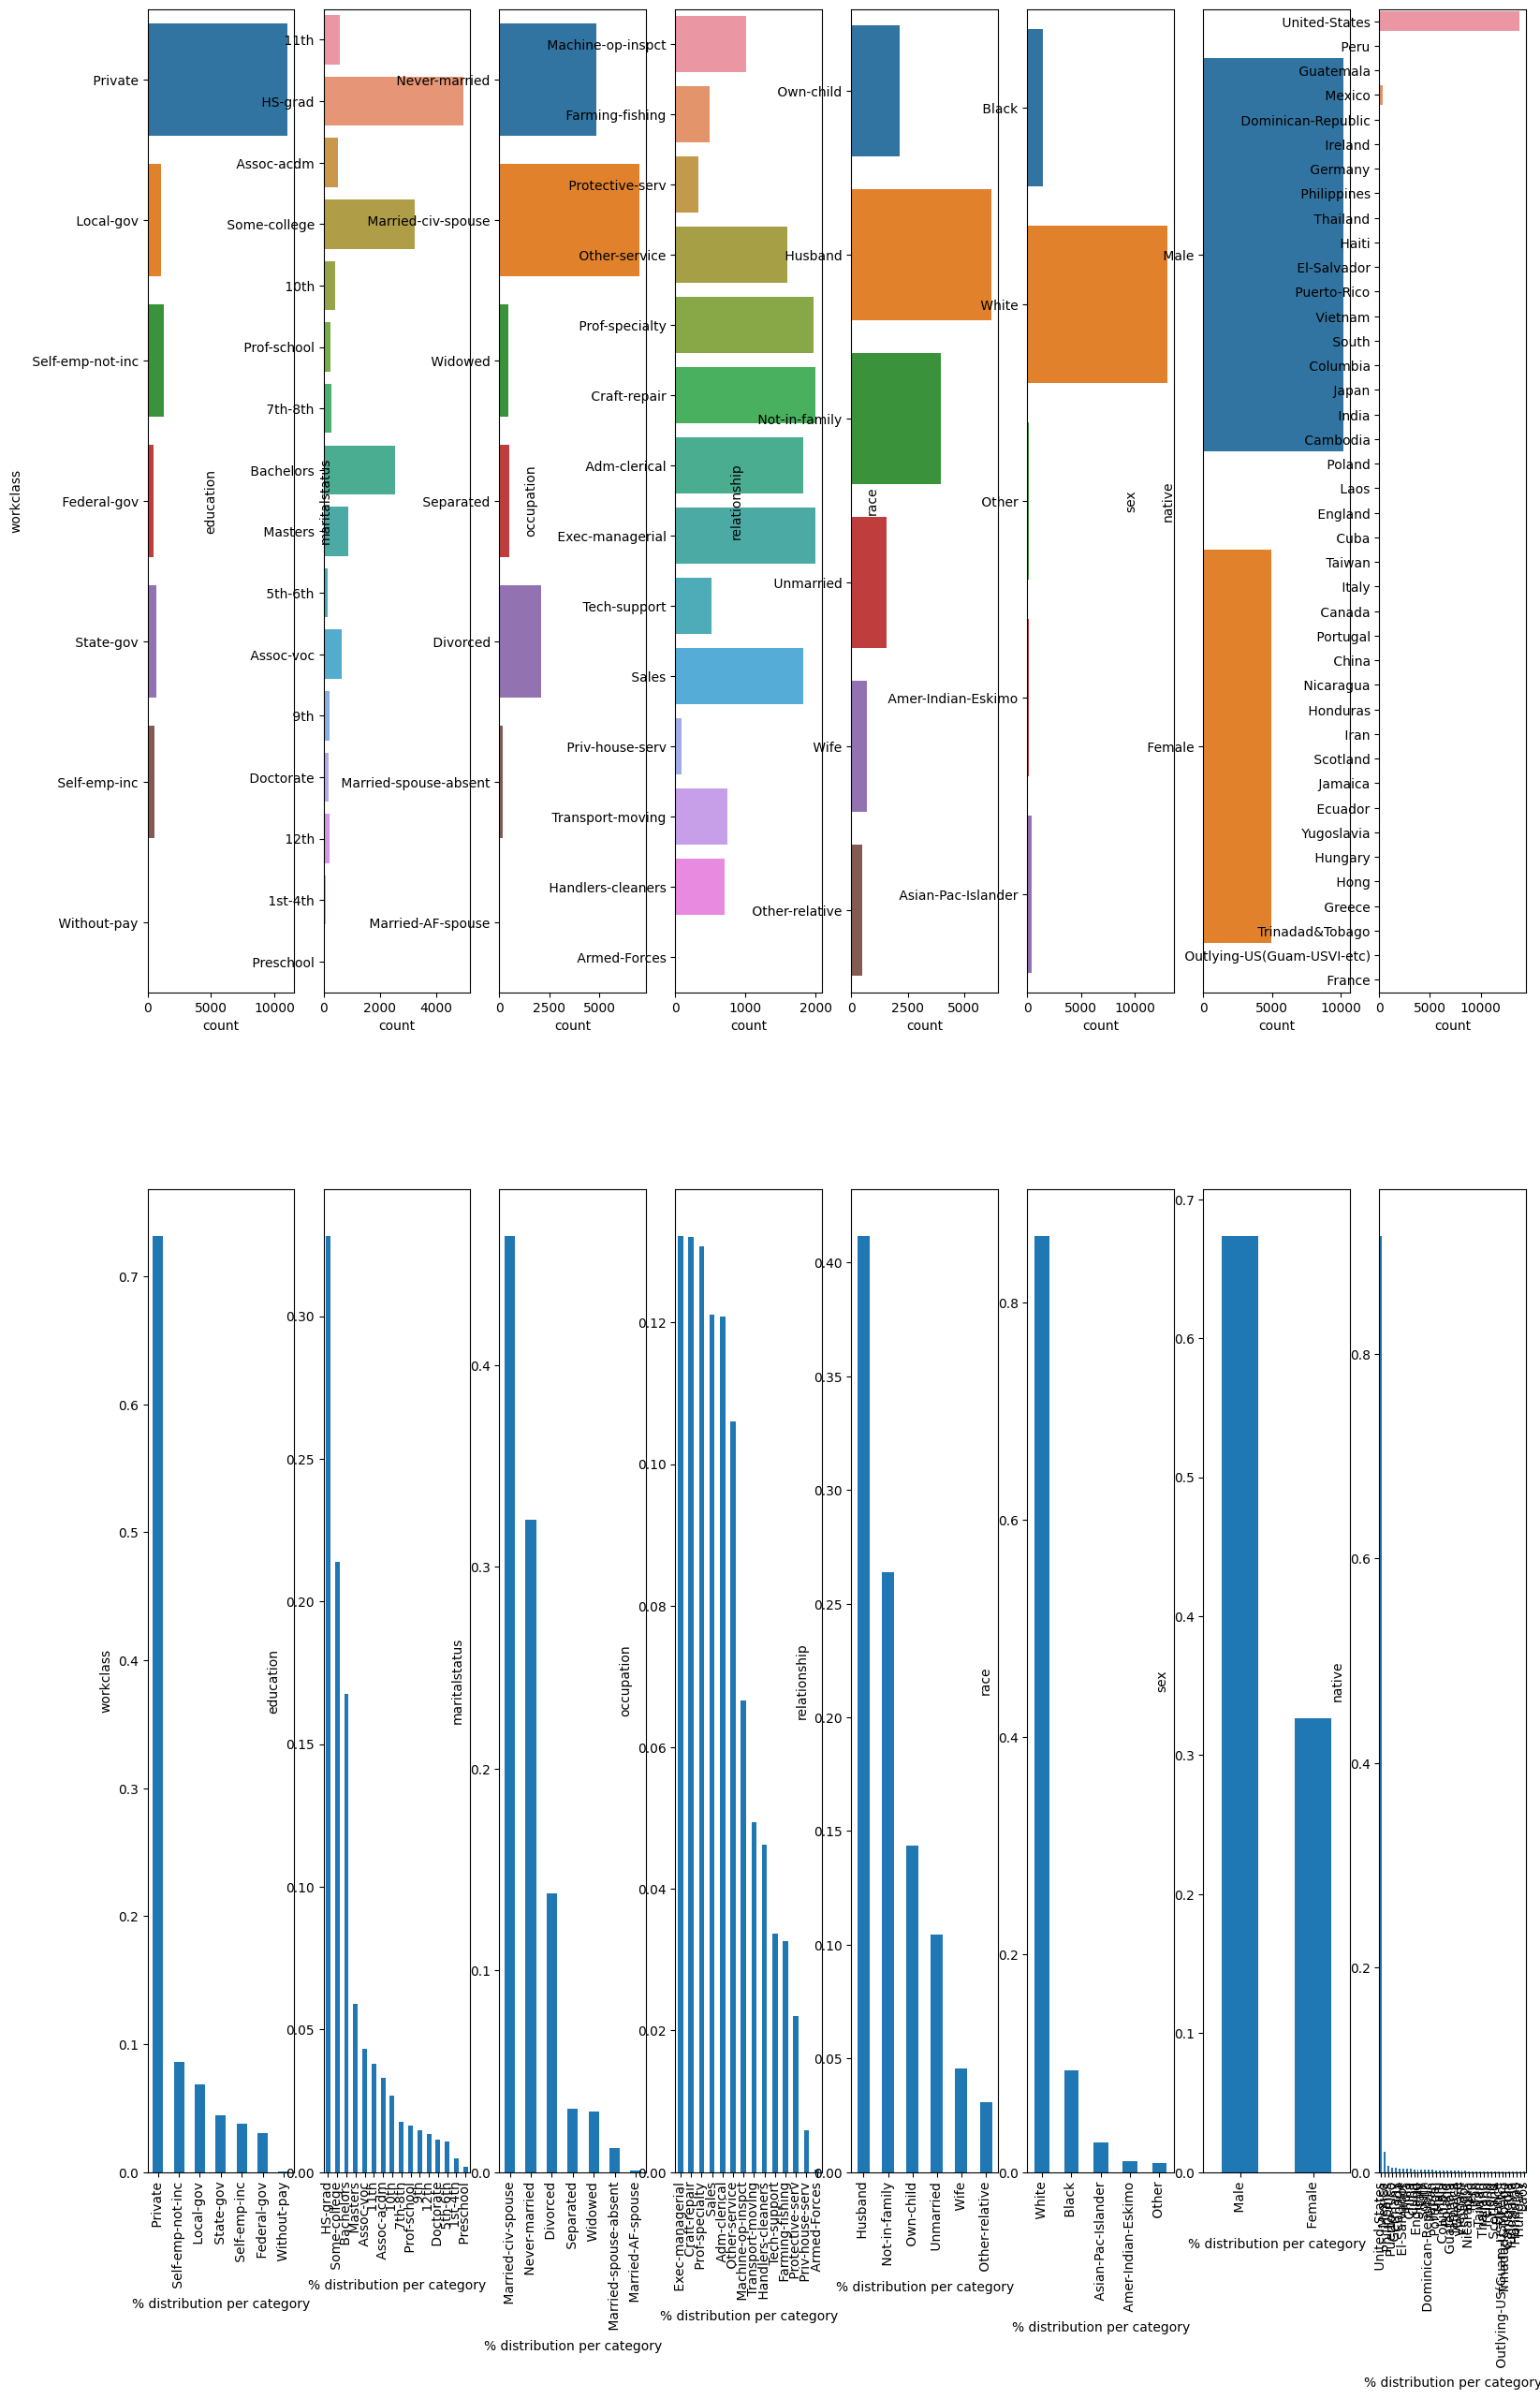

In [201]:
df_test = df_test[df_test.columns[0:13]]
obj_colum = df_test.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(19,30))
num_cols = len(obj_colum)

for i, col in enumerate(obj_colum, 1):
    plt.subplot(2, num_cols, i)
    sns.countplot(data=df_test, y=col)

    plt.subplot(2, num_cols, i + num_cols)
    df_test[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

plt.tight_layout()
plt.show()

In [202]:
num_columns = df_test.select_dtypes(exclude='object').columns.tolist()


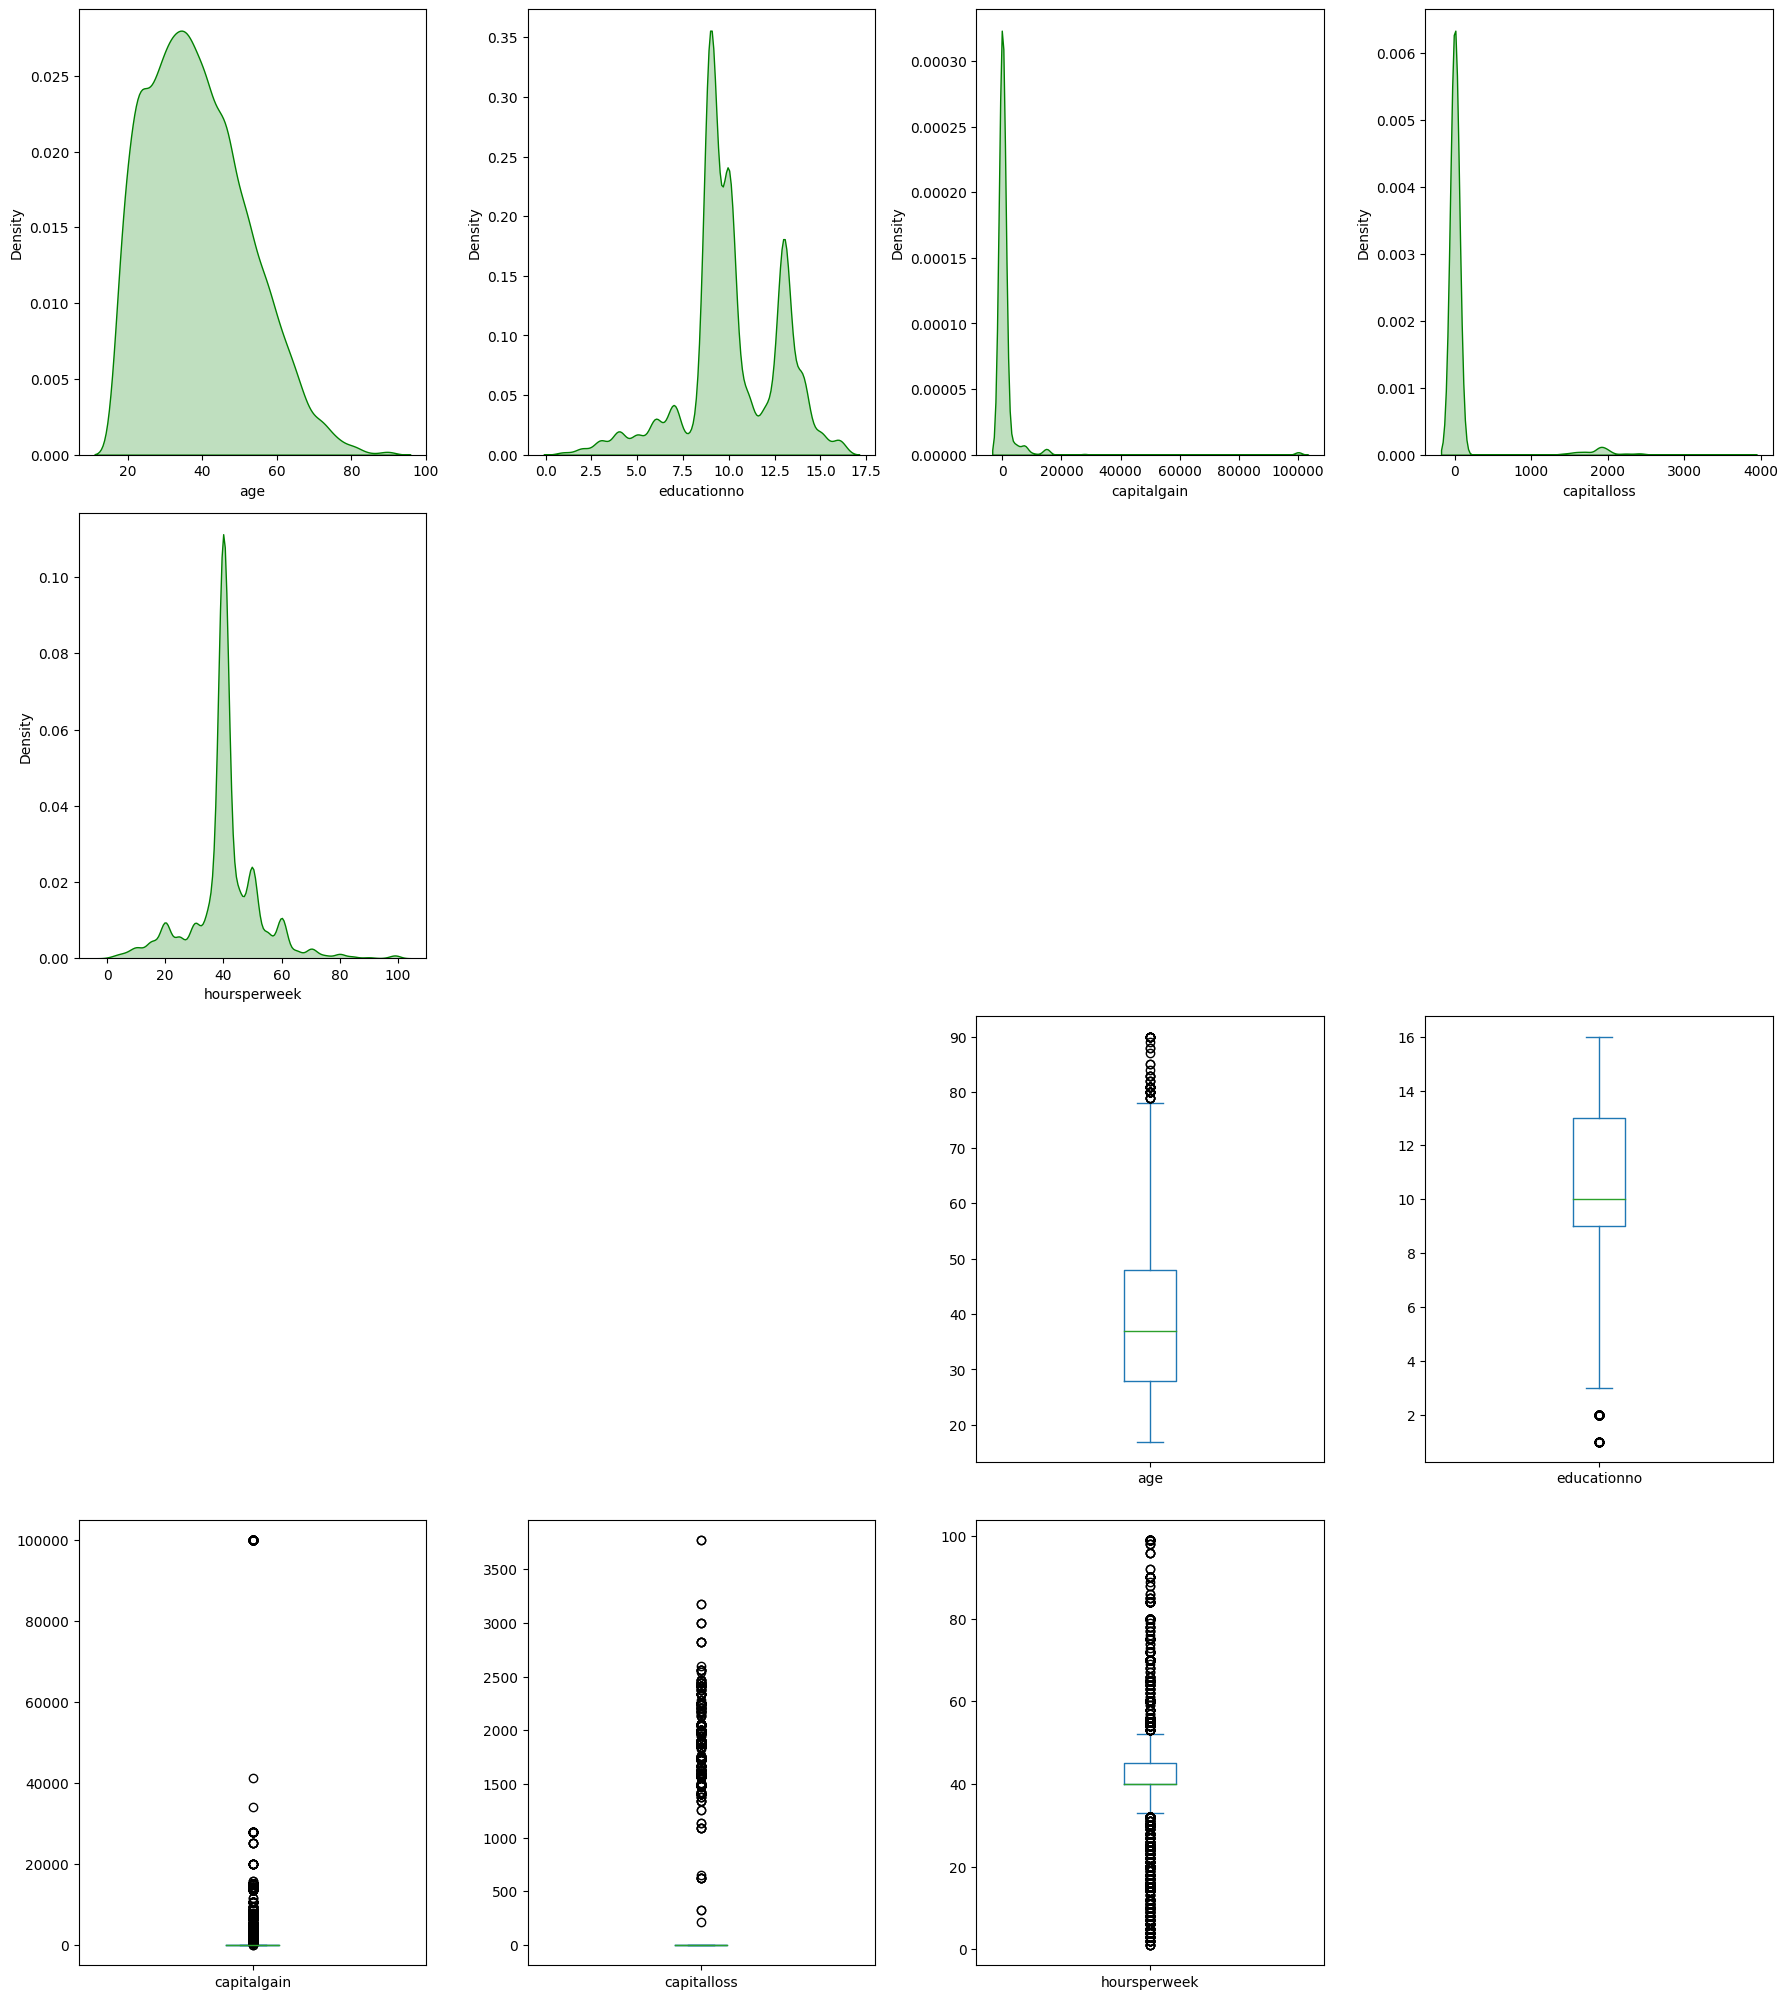

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.536112,-0.320999,11.570156,4.496738,0.359502
kurtosis,-0.181312,0.618468,143.591390,19.080685,3.267311


In [203]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df_test[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df_test[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df_test[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


<Axes: >

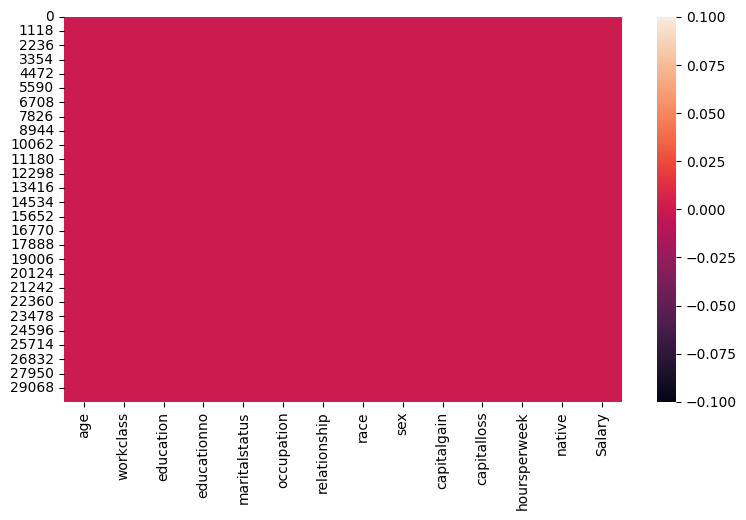

In [204]:
#visualization of salarydata_train ('df_train')
import seaborn as sns
sns.heatmap(df_train.isnull())

Skew: -0.305378355820322
Kurtosis: 0.643604835875955


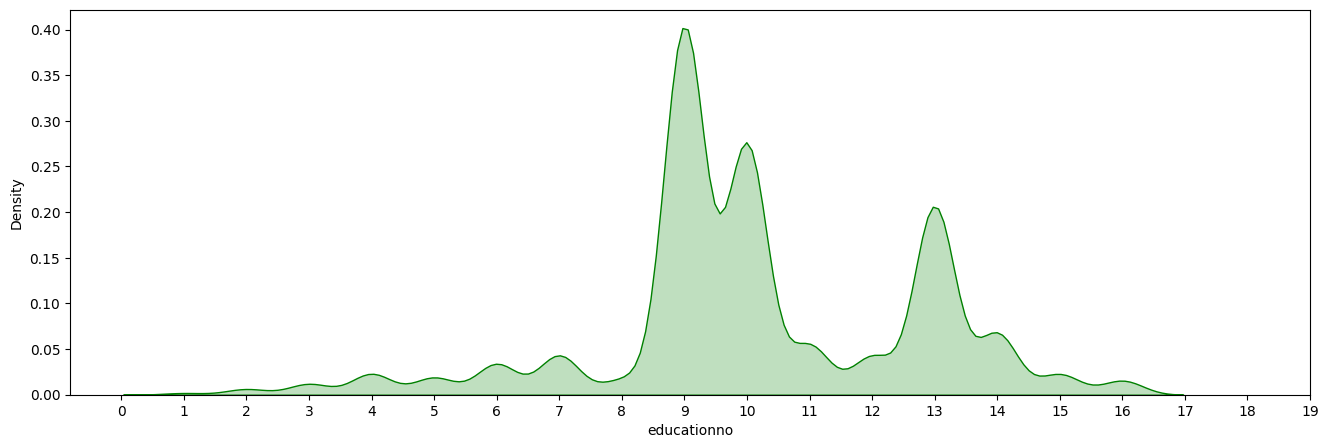

In [205]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df_train['educationno'].skew()))
print("Kurtosis: {}".format(df_train['educationno'].kurtosis()))
ax = sns.kdeplot(df_train['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [206]:
df_train = df_train[df_train.columns[0:13]]
obj_colum = df_train.select_dtypes(include='object').columns.tolist()

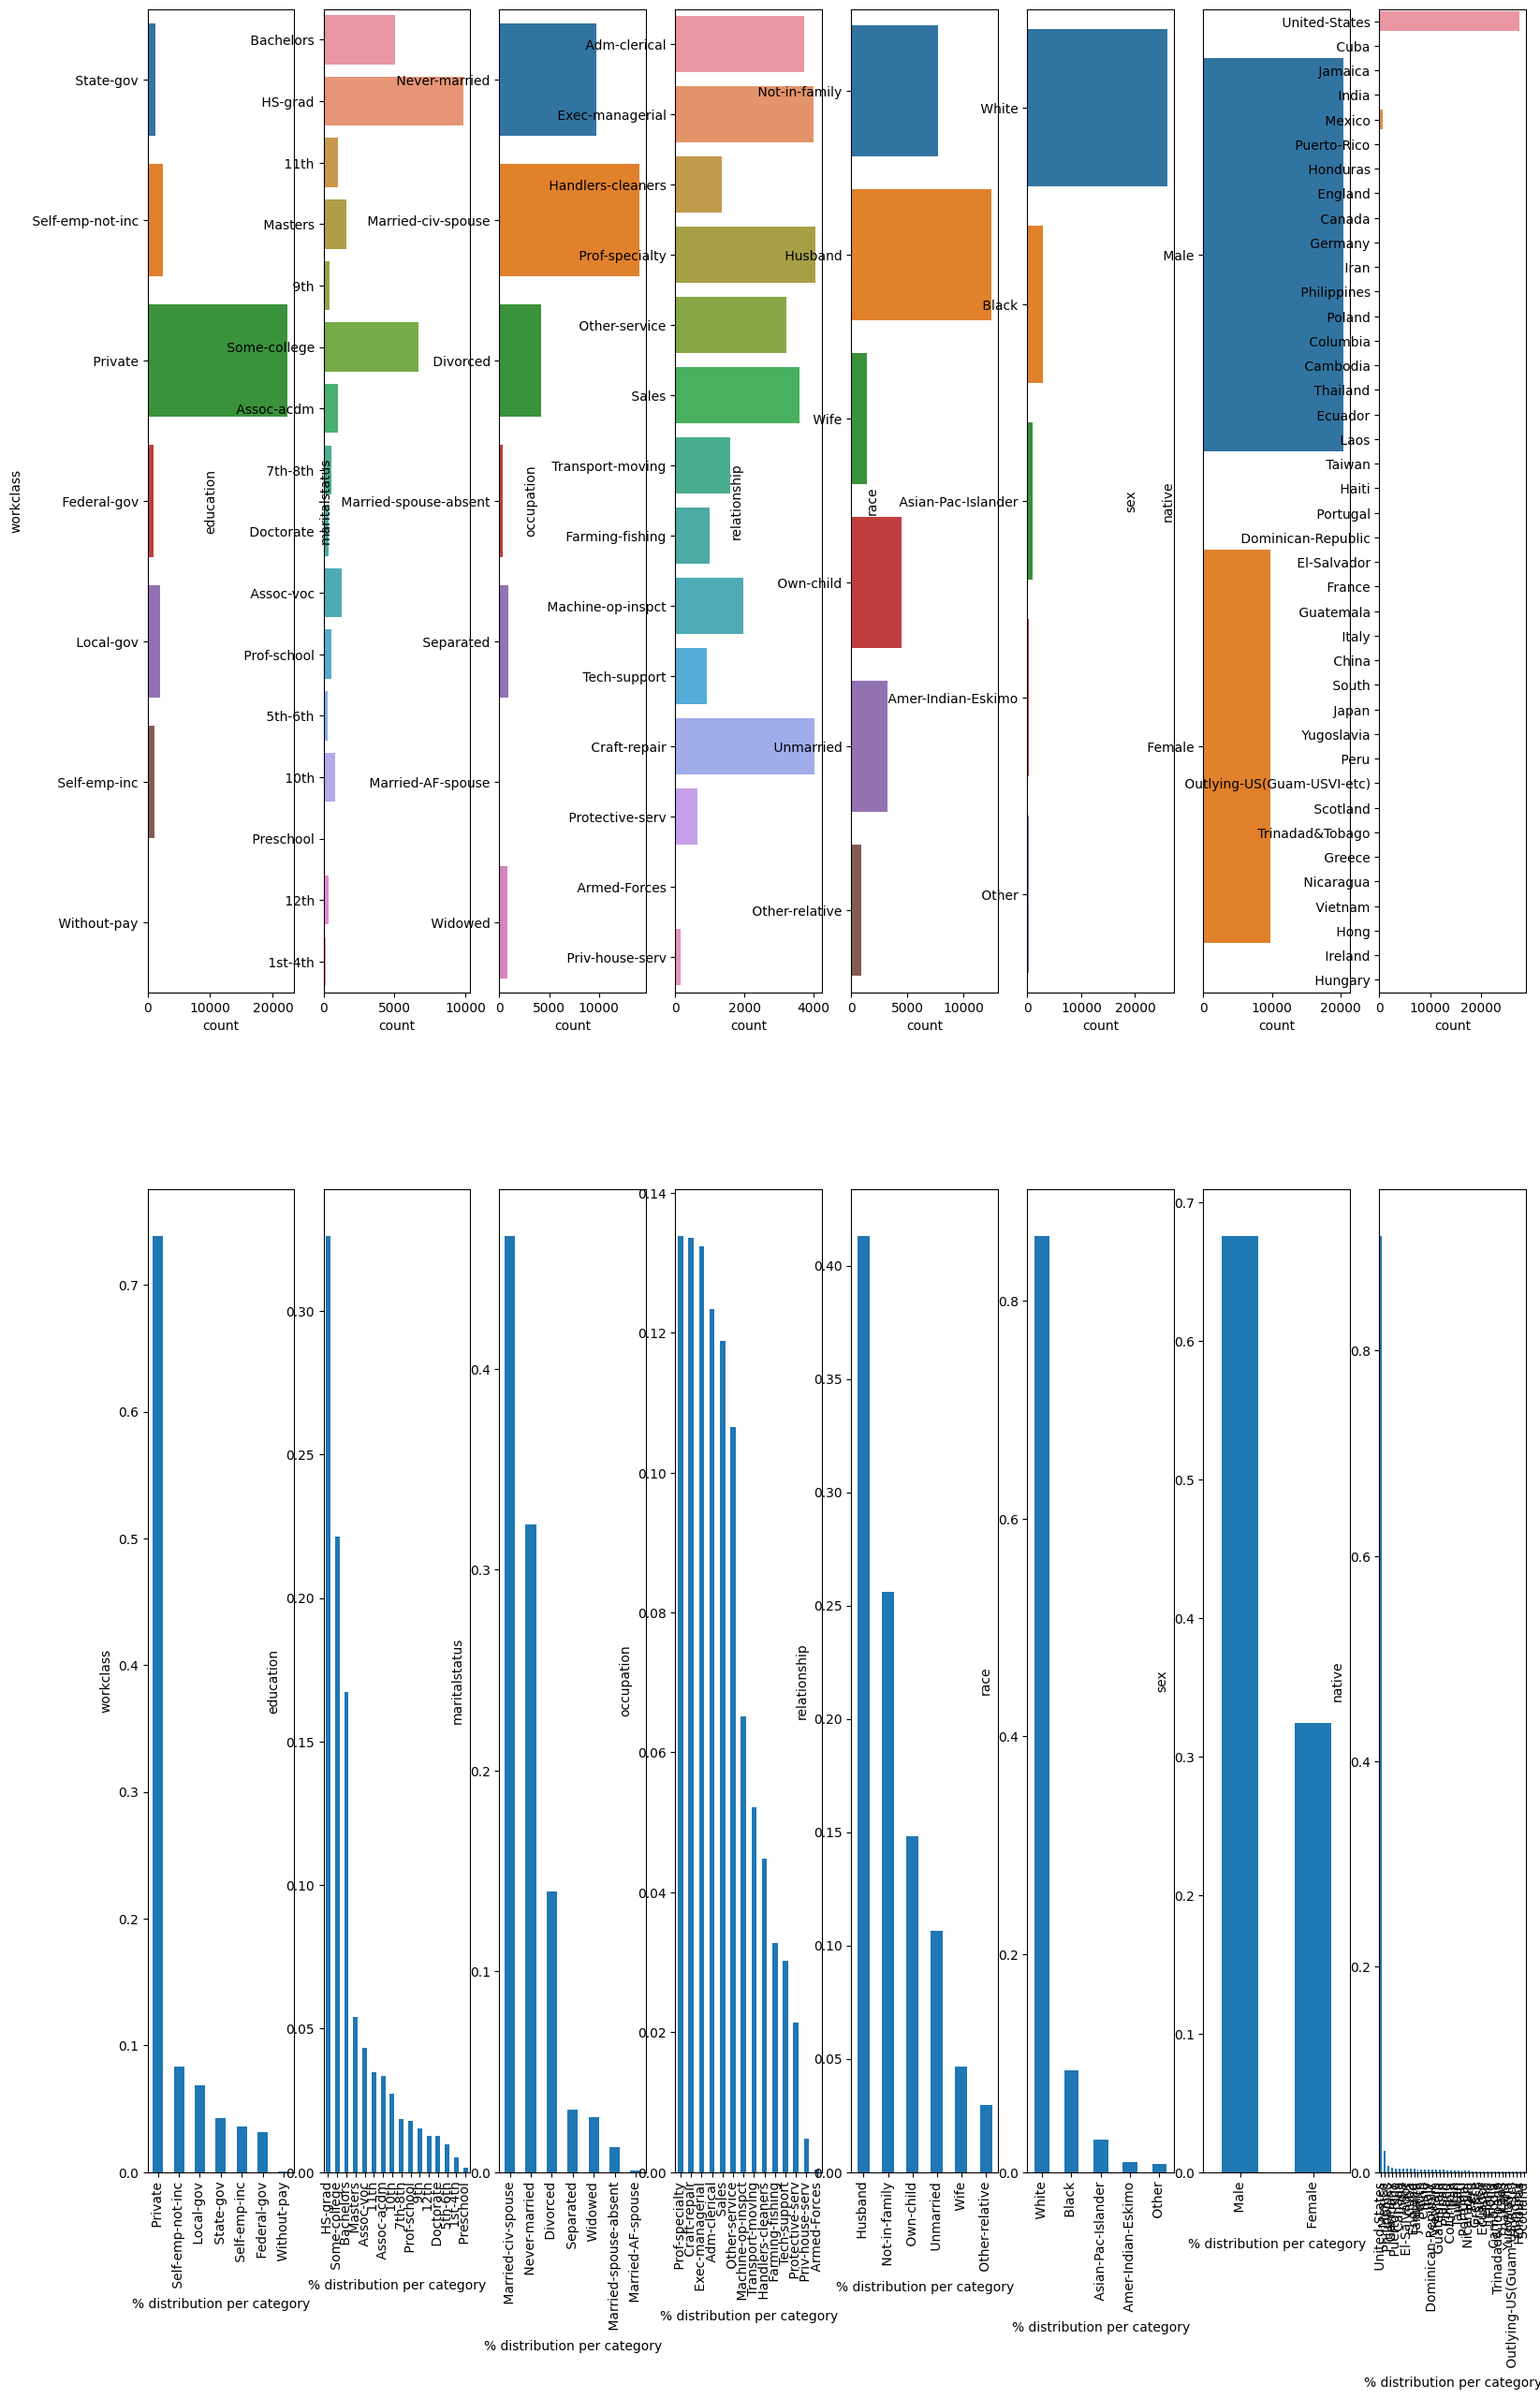

In [207]:
plt.figure(figsize=(19,30))
num_cols = len(obj_colum)

for i, col in enumerate(obj_colum, 1):
    plt.subplot(2, num_cols, i)
    sns.countplot(data=df_train, y=col)
    plt.subplot(2, num_cols, i + num_cols)
    df_train[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')

plt.tight_layout()
plt.show()

In [208]:
num_columns = df_train.select_dtypes(exclude='object').columns.tolist()


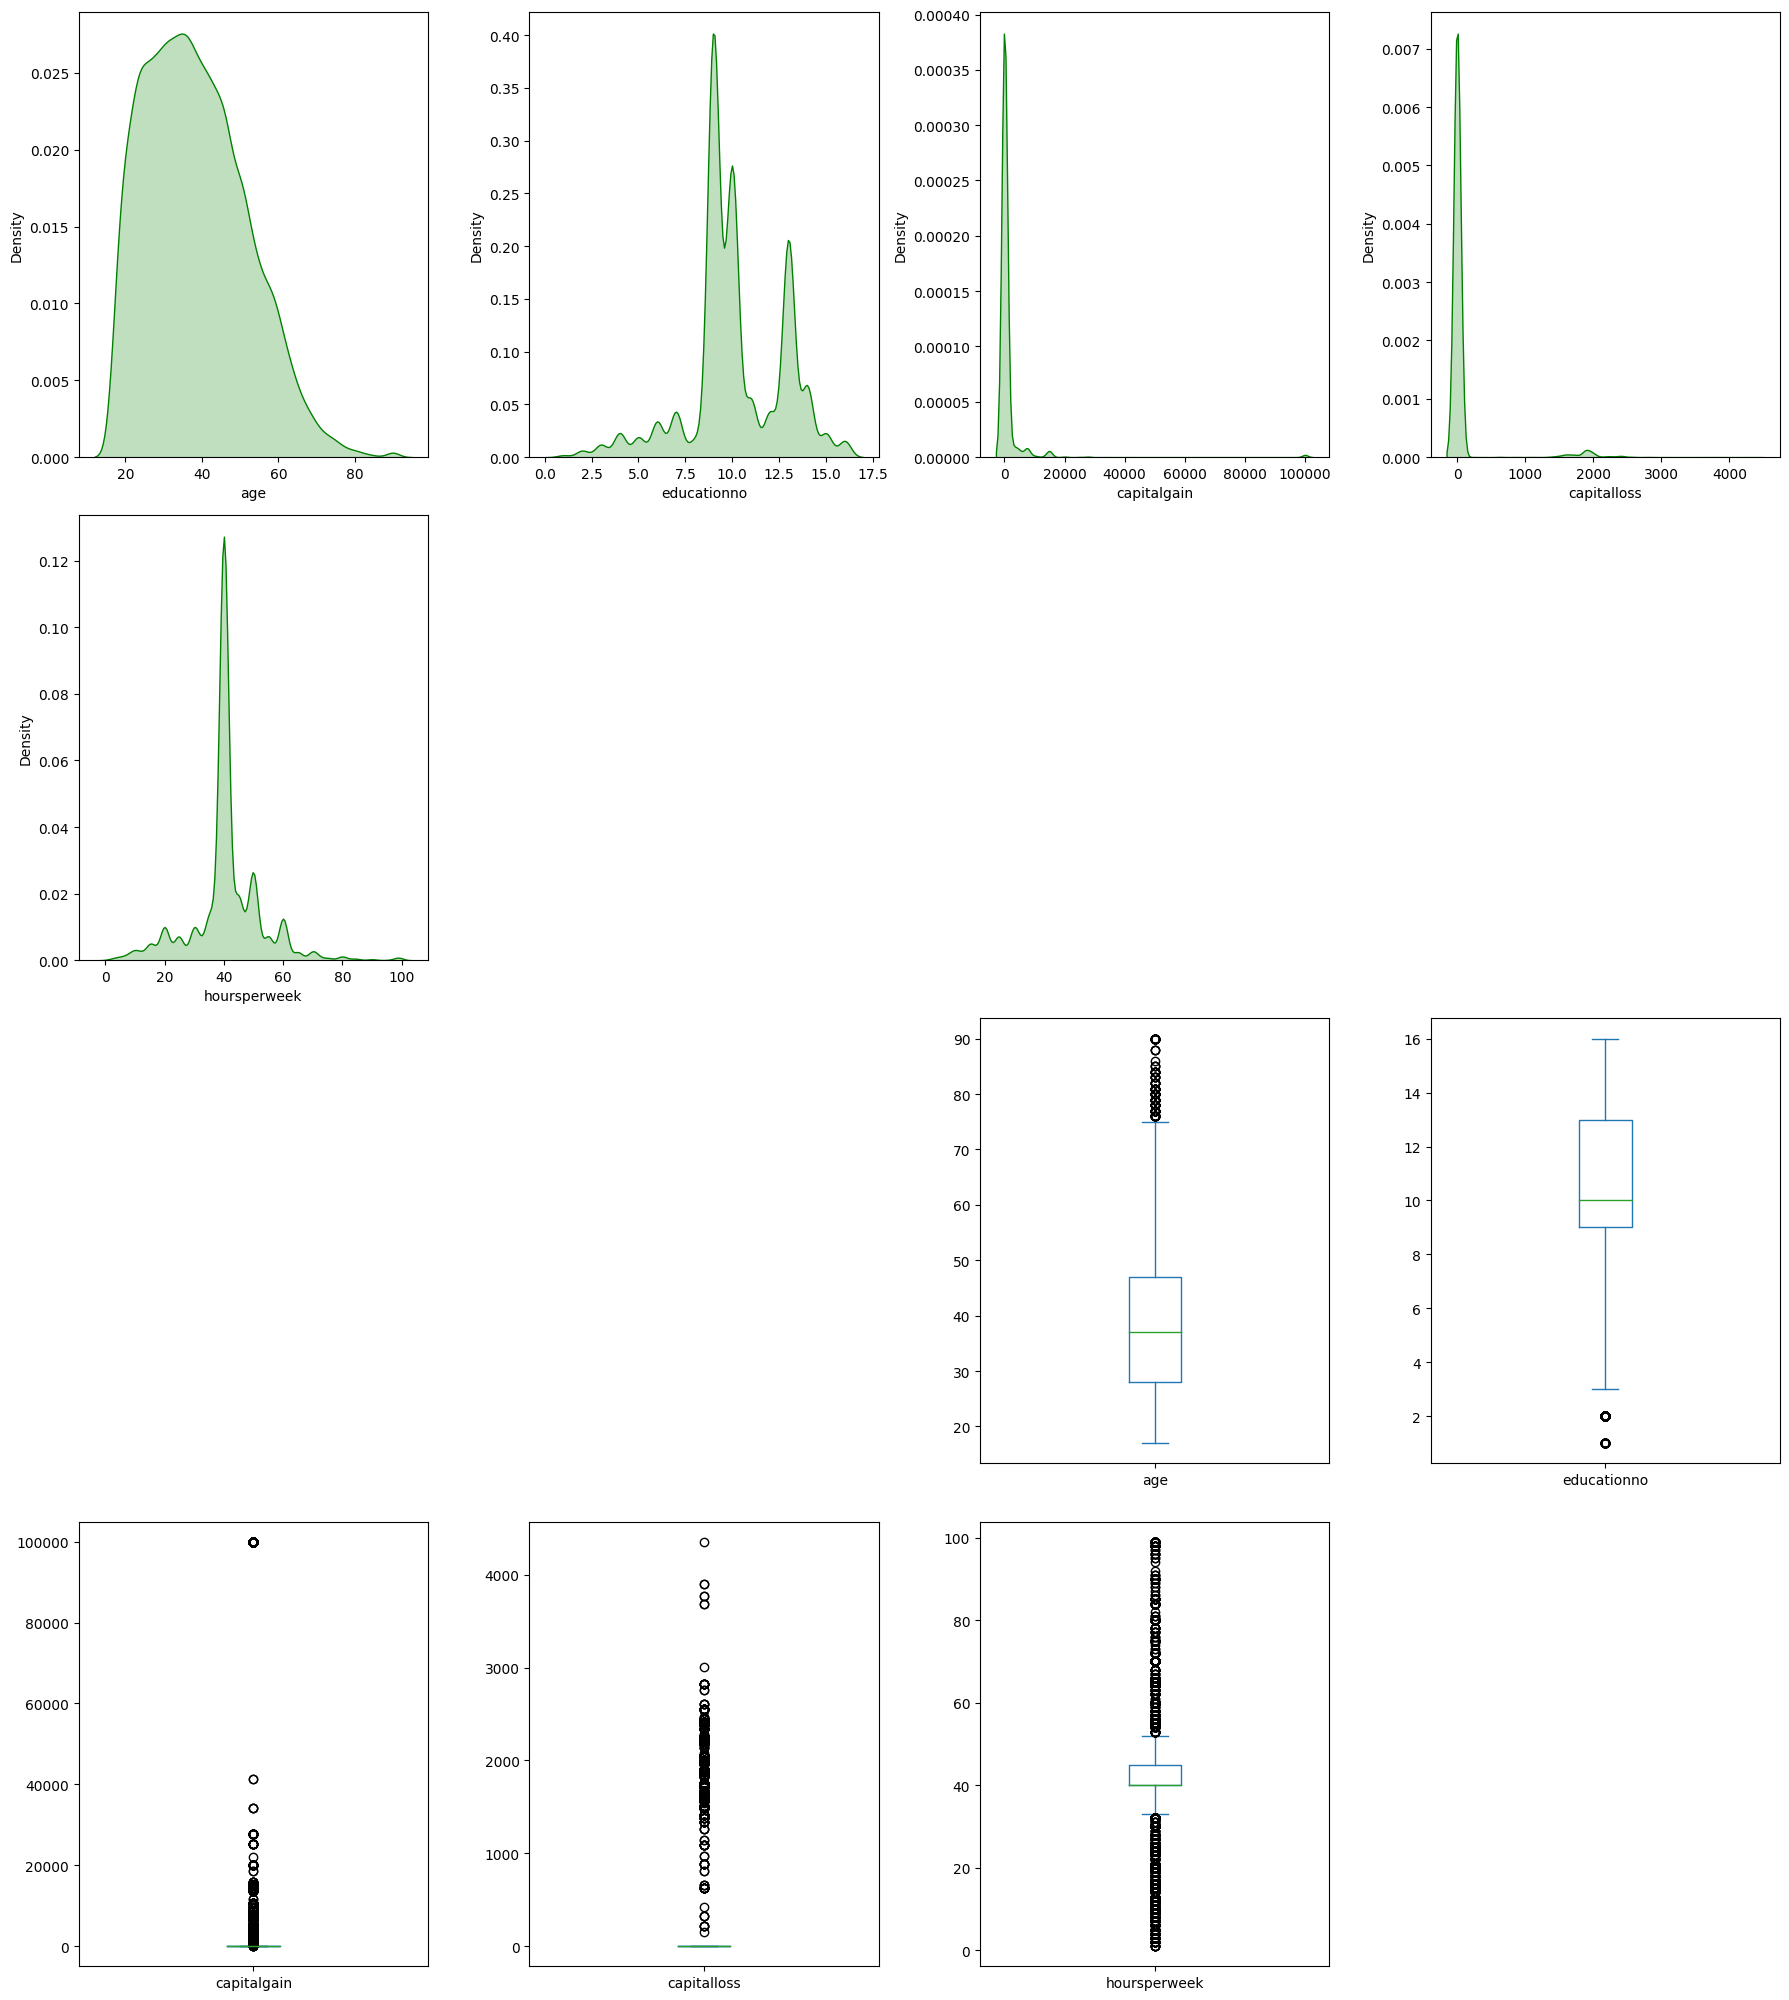

,age,educationno,capitalgain,capitalloss,hoursperweek
skewness,0.53018,-0.305378,11.902483,4.528238,0.330856
kurtosis,-0.14476,0.643605,153.661174,19.529284,3.167683


In [209]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df_train[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df_train[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df_train[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

#Forest Dataset

In [210]:
forest=pd.read_csv('/content/forestfires.csv')

In [211]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [212]:
forest.value_counts('month')

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [214]:
forest['y']=lb.fit_transform(forest['size_category'])

In [215]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,y
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,large,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,large,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,large,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,small,1


In [216]:
forest=forest.drop(['month','day','size_category'],axis=1)
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,y
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [217]:
from sklearn.model_selection import train_test_split


In [218]:
x=forest.drop('y',axis=1)
y=forest['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

In [219]:
from sklearn.svm import SVC
model=SVC()

In [220]:
model.fit(x_train,y_train)

SVC()

In [221]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear', 'poly']}


In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [224]:
grid.fit(x_train,y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [225]:
grid.best_params_


{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [226]:
grid_predictions=grid.predict(x_test)


In [227]:
from sklearn.metrics import classification_report,confusion_matrix


In [228]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 52   0]
 [  3 116]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.97      0.99       119

    accuracy                           0.98       171
   macro avg       0.97      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



In [229]:
np.mean(grid_predictions==y_test)*100


98.24561403508771

#Visualization

<Axes: >

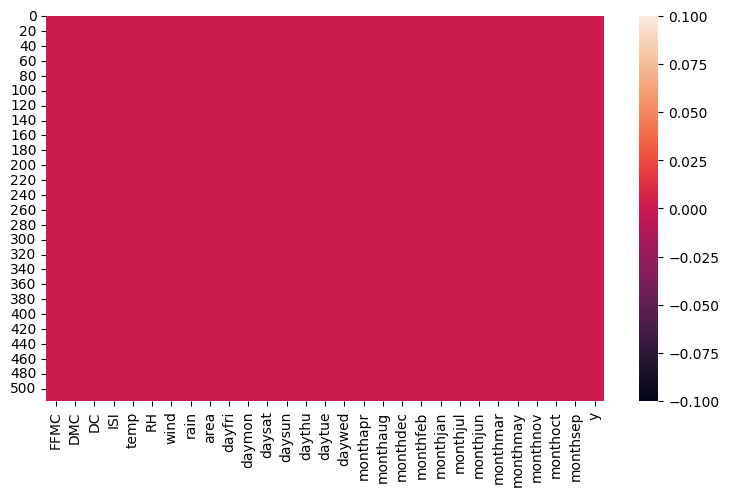

In [230]:
import seaborn as sns
sns.heatmap(forest.isnull())

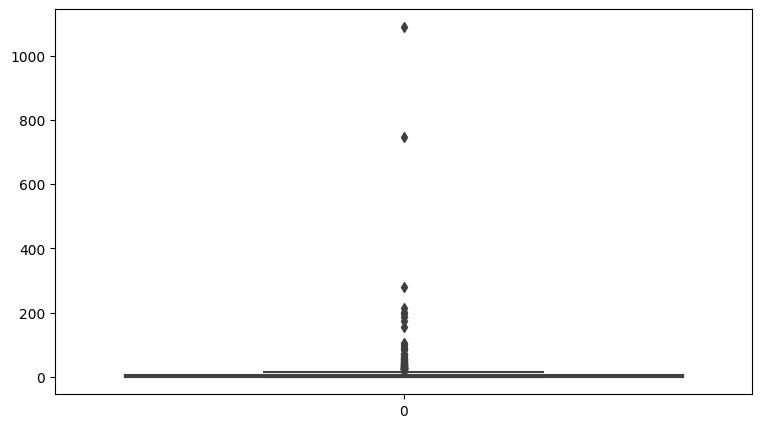

In [231]:
#Outlier check
ax = sns.boxplot(forest['area'])


Skew: 12.846933533934868
Kurtosis: 194.1407210942299


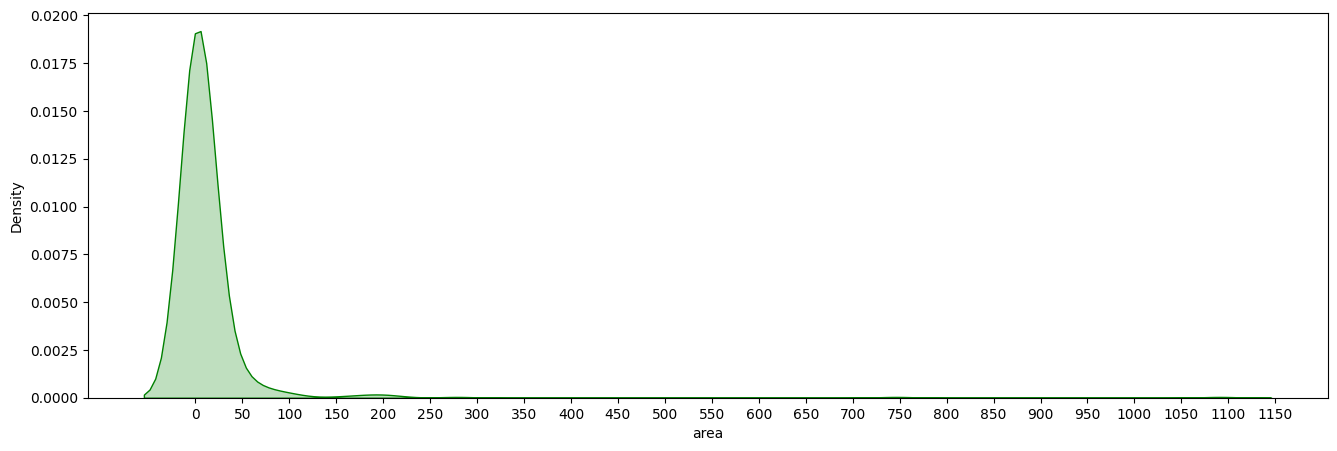

In [232]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest['area'].skew()))
print("Kurtosis: {}".format(forest['area'].kurtosis()))
ax = sns.kdeplot(forest['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()


In [233]:
forest=forest[forest.columns[0:10]]
month_colum = forest.select_dtypes(include='object').columns.tolist()


In [234]:
plt.figure(figsize=(19,30))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forest,y=col)
    plt.subplot(2,2,i+2)
    forest[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()


<Figure size 1900x3000 with 0 Axes>

In [235]:
num_columns = forest.select_dtypes(exclude='object').columns.tolist()


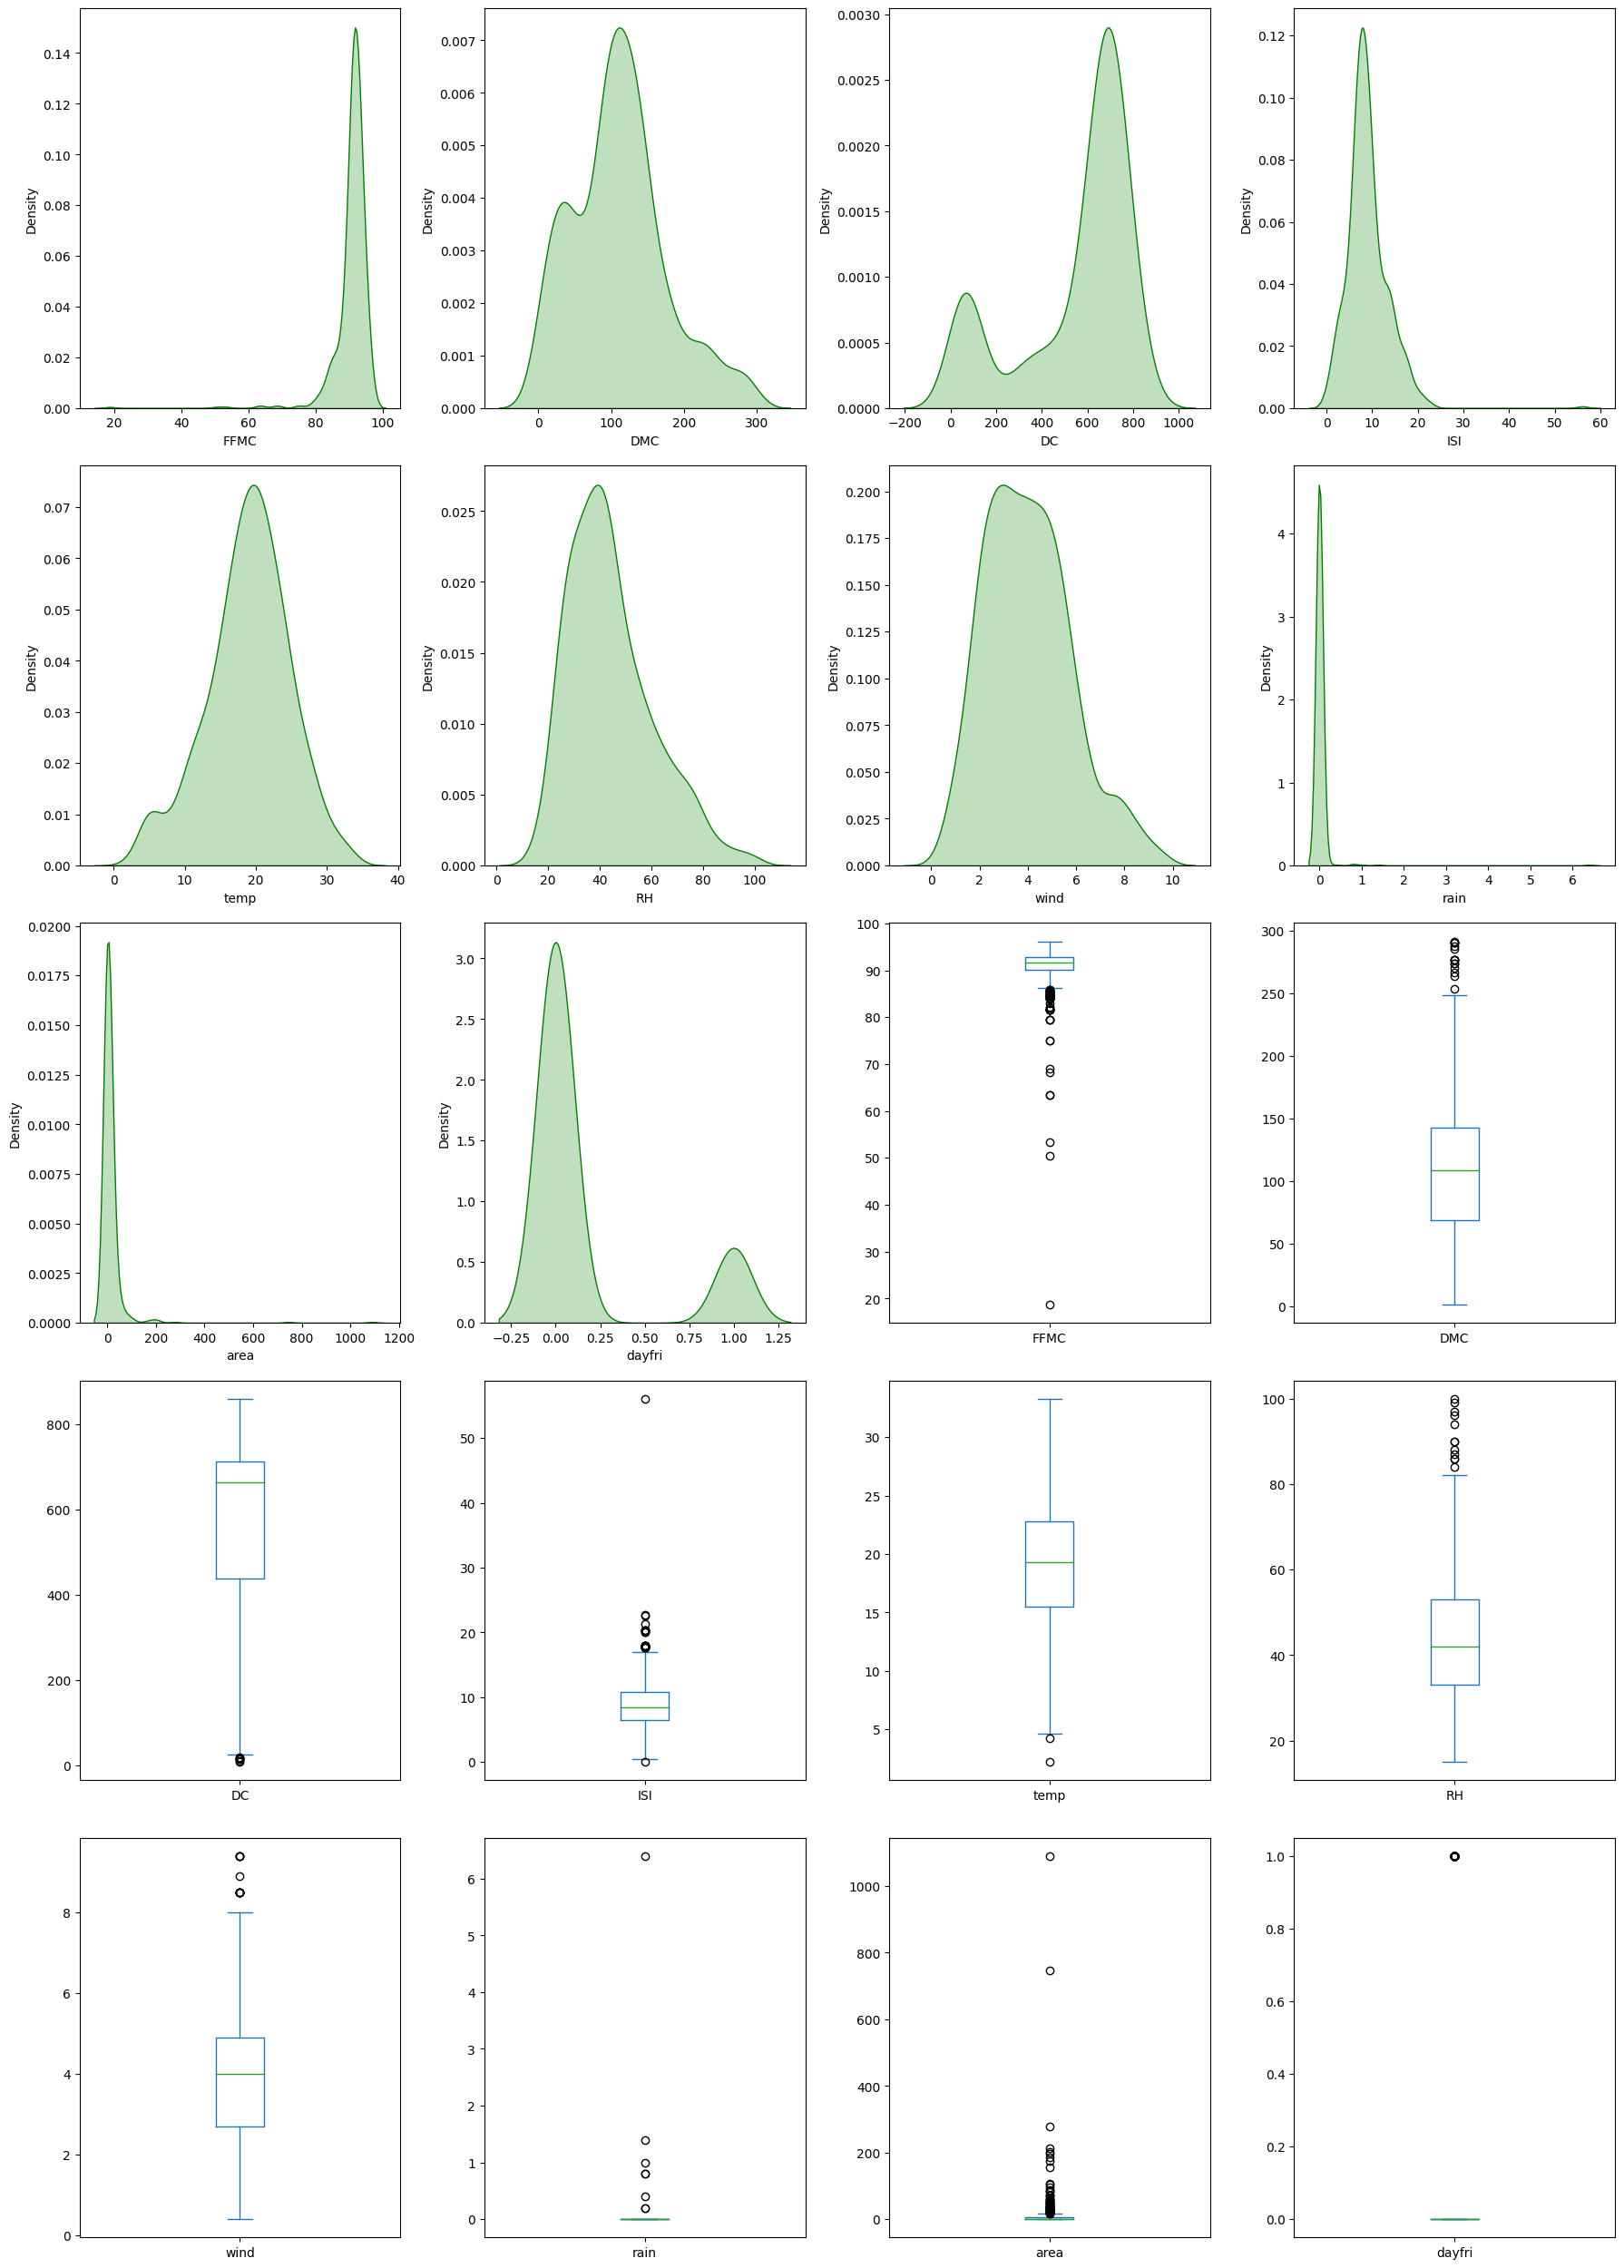

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [236]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    forest[col].plot.box()
plt.tight_layout()
plt.show()
num_data = forest[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])
